In [1]:
import json

In [3]:
with open("/home/storage/aux/backup/ocr_second_step.json", 'r') as file:
    results = json.load(file)

/home/ngoc/anaconda3/envs/codetr/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.


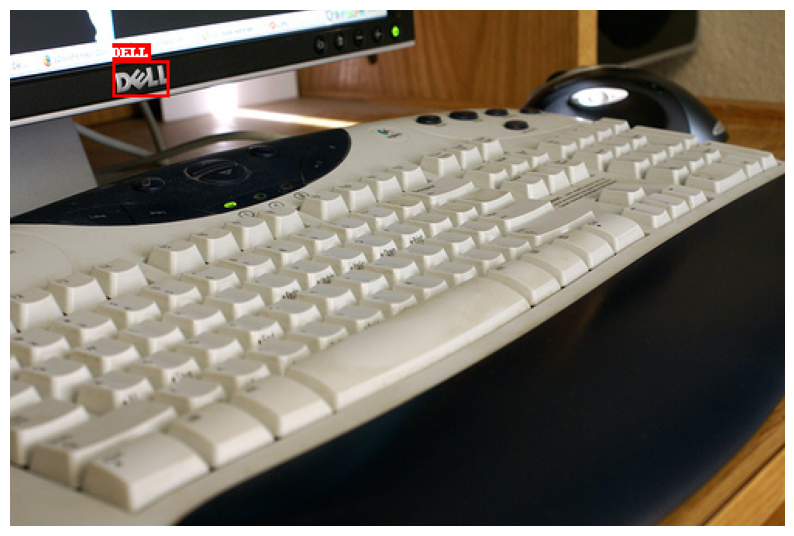

In [9]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def visualize_image_with_bboxes(image_path, bboxes, labels, scores):
    # Load the image
    image = Image.open(image_path).convert("RGB")
    
    # Create a drawing context
    draw = ImageDraw.Draw(image)
    
    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", 15)
    except IOError:
        font = ImageFont.load_default()

    # Draw bounding boxes and labels
    for bbox, label, score in zip(bboxes, labels, scores):
        if score >= 0.3:
            xmin, ymin, xmax, ymax = bbox
            # Draw the bounding box
            draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=2)
            # Put the label near the bounding box
            text_size = draw.textsize(label, font=font)
            draw.rectangle([xmin, ymin - text_size[1], xmin + text_size[0], ymin], fill="red")
            draw.text((xmin, ymin - text_size[1]), label, fill="white", font=font)
    
    # Display the image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

idx = 100
image_path = f'/mnt/datasets/llava_data/llava_second_stage/{results[0]["texts"]}'
bboxes = results[0]["bboxes"]  # Example bounding boxes (x, y, width, height)
labels = results[0]["idx"]
scores = results[0]["idx"]
visualize_image_with_bboxes(image_path, bboxes, labels, scores)

In [7]:
results[0]

{'img': 'vg/VG_100K/2359476.jpg',
 'texts': ['DELL'],
 'bboxes': [[66.0, 33.0, 102.0, 56.0]],
 'scores': [0.9036558866500854]}